# **Curso: Programación para el Análisis de Datos**
## **Tarea: Desarrollo de código para el tratamiento y manejo de información**

---

**Presentado por:** Deiver Enrique Alfonso Cortes

**Grupo:** 49

**Código:** 203008069

**Presentado a:** Miguel Ángel Vargas Valencia

**Universidad Nacional Abierta y a Distancia – UNAD**

**Fecha:** 27/10/2024

### **Ejercicio 1: Datos en línea y tipos de datos.**

#### - **Responda las siguientes preguntas en la introducción:**
##### -- ¿Qué es REST web service y cómo se utilizan?
Un servicio web REST es una forma de estructurar servicios que permite la interoperabilidad entre sistemas utilizando HTTP como protocolo base. En lugar de depender de sesiones continuas o estados mantenidos en el servidor, cada interacción es independiente, haciendo que cada solicitud contenga toda la información necesaria para ser procesada. Los recursos que se exponen en un servicio REST se representan con URIs y se manipulan mediante operaciones HTTP estándar.

REST es ideal para aplicaciones escalables y distribuidas, ya que al separar el cliente del servidor, cada parte puede evolucionar sin afectar a la otra. Además, la arquitectura simplifica el desarrollo al ofrecer un enfoque uniforme y eficiente para integrar distintos sistemas. La flexibilidad para elegir los formatos de respuesta (como JSON, XML o HTML) y la posibilidad de cachear las respuestas contribuyen a su rendimiento y eficiencia en diversas aplicaciones, incluidas las móviles y basadas en la web.
##### -- ¿Qué es una RESTful API?
Una RESTful API es una interfaz de programación de aplicaciones (API) que sigue los principios de la arquitectura REST (Representational State Transfer). Esta API permite la comunicación entre sistemas utilizando el protocolo HTTP para acceder, manipular y transferir recursos de manera eficiente.

En una RESTful API, los recursos se identifican mediante URIs (Uniform Resource Identifiers), y cada operación sobre estos recursos se asocia con los métodos estándar de HTTP: GET (para leer), POST (para crear), PUT (para actualizar) y DELETE (para eliminar). La API es stateless (sin estado), lo que significa que cada solicitud contiene toda la información necesaria para procesarla sin depender de peticiones anteriores.
##### -- ¿Qué es JSON?
JSON (JavaScript Object Notation) es un formato ligero y estructurado para intercambiar datos entre sistemas. Está basado en una sintaxis simple que utiliza pares clave-valor, lo que facilita la lectura y escritura tanto para los humanos como para las máquinas. Aunque tiene sus raíces en JavaScript, es un formato independiente del lenguaje y ampliamente compatible con diversas tecnologías. 

#### - **Desarrolle un código de Python que le permita obtener los datos de las naves de SpaceX, desde la API spacexdata v4:**
  [https://api.spacexdata.com/v4/ships](https://api.spacexdata.com/v4/ships)

  Tenga en cuenta que debe usar el paquete `requests`, funciones:
  - `request.get`
  - `Response.json`

  De ser necesario, puede revisar su documentación en:
  [https://requests.readthedocs.io/en/latest/api/?requests.Request](https://requests.readthedocs.io/en/latest/api/?requests.Request)

In [104]:
import requests

def get_spacex_ships_data():
    """
    Helper para realizar una solicitud GET a la API de SpaceX y obtener los datos de las naves.
    Maneja errores HTTP y de conexión.

    @return {list} - Lista de naves si la solicitud es exitosa.
    @raises {Exception} - Si la solicitud falla o no se puede acceder al contenido JSON.
    """
    url = "https://api.spacexdata.com/v4/ships"
    try:
        response = requests.get(url)
        # Verificar errores
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error al realizar la petición: {e}")
        raise


data = get_spacex_ships_data()
size_rows = len(data)
print(size_rows)

29


#### - **Cargue el JSON de la respuesta del request anterior como un DataFrame de pandas (ayuda: función `pd.DataFrame.from_dict`).**

In [105]:
import pandas as pd
## verificar que data exista.
if data:
    df = pd.DataFrame.from_dict(data)
else:
    print("No se pudo cargar el DataFrame debido a un error en la petición.")
df.head()

,last_ais_update,legacy_id,model,type,roles,imo,mmsi,abs,class,mass_kg,...,speed_kn,course_deg,latitude,longitude,link,image,name,active,launches,id
0,None,AMERICANCHAMPION,None,Tug,"[Support Ship, Barge Tug]",7434016.0,367020820.0,571252.0,7604342.0,266712.0,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/woCxpkj.jpg,American Champion,False,"[5eb87cdeffd86e000604b330, 5eb87cdfffd86e00060...",5ea6ed2d080df4000697c901
1,None,AMERICANISLANDER,None,Cargo,[Dragon Recovery],NaN,367035570.0,NaN,NaN,NaN,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/jmj8Sh2.jpg,American Islander,False,"[5eb87ce0ffd86e000604b332, 5eb87ce1ffd86e00060...",5ea6ed2d080df4000697c902
2,None,AMERICANSPIRIT,None,Cargo,[Support Ship],NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,None,None,American Spirit,False,[5eb87ce1ffd86e000604b334],5ea6ed2d080df4000697c903
3,None,ASOG,None,Barge,[ASDS barge],NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,None,None,A Shortfall of Gravitas,True,"[5fe3b11eb3467846b324216c, 5fe3b15eb3467846b32...",5ea6ed2d080df4000697c904
4,None,BETTYRGAMBARELLA,None,Tug,[ASDS Tug],7517478.0,368000890.0,562590.0,7427463.0,202302.0,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/ngYgFnn.jpg,Betty R Gambarella,False,"[5eb87d08ffd86e000604b357, 5eb87d0affd86e00060...",5ea6ed2e080df4000697c905



#### - **Determine cuántas columnas tiene el DataFrame anterior, los tipos de datos (Dtype) que tiene y los datos ausentes (ayuda: imprima el `info()` del DataFrame de pandas).**

In [106]:
if df is not None:
    df.info()
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_ais_update  0 non-null      object 
 1   legacy_id        22 non-null     object 
 2   model            3 non-null      object 
 3   type             29 non-null     object 
 4   roles            29 non-null     object 
 5   imo              21 non-null     float64
 6   mmsi             24 non-null     float64
 7   abs              18 non-null     float64
 8   class            18 non-null     float64
 9   mass_kg          21 non-null     float64
 10  mass_lbs         21 non-null     float64
 11  year_built       26 non-null     float64
 12  home_port        29 non-null     object 
 13  status           17 non-null     object 
 14  speed_kn         0 non-null      object 
 15  course_deg       0 non-null      object 
 16  latitude         2 non-null      float64
 17  longitude        2

#### - **Con la información anterior, en una celda markdown concluya cuáles de las variables podrían ser utilizadas para un análisis y clasifíquelas entre variables cualitativas (categóricas) y cuantitativas (numéricas)**.

**Variables cuantitativas (numéricas):**

- imo: Identificador marítimo único, relevante para la identificación pero no para el análisis numérico.
- mmsi: Similar al IMO, más útil como identificador que para análisis numérico.
- **abs**: No es directamente útil para análisis estadístico, pero puede emplearse para clasificar barcos por su certificación.
- **class**: Puede utilizarse para agrupar barcos por clase.
- **mass_kg**: Variable para análisis de distribución de peso y capacidad.
- **mass_lbs**: Similar a mass_kg, pero se debería normalizar a una sola unidad de medida.
- **year_built**: Útil para analizar la antigüedad de las embarcaciones.
- speed_kn -  Sin datos útiles disponibles, esta variable se descarta para análisis.
- course_deg - Sin datos útiles disponibles, esta variable se descarta para análisis.
- latitude  - Información geoespacial, pero con pocos datos disponibles (solo 2 no nulos)
- logitude - Similar a latitude, pero también con escasa información disponible.

**Variables cualitativas (categóricas):**

- legacy_id: Puede ser utilizado como un identificador o referencia histórica.
- **model**: Se puede utilizar para analizar el desempeño o distribución por modelo.
- **type**: Útil para clasificar por tipo de barco y analizar patrones por categoría.
- **roles**: Puede usarse para analizar los distintos usos de los barcos.
- **home_port**: Permite análisis por puerto de origen.
- **status**: Útil para filtrar barcos activos e inactivos.
- link: No aporta directamente al análisis, pero sirve para referencias externas.
- **name**: Identificador que puede ser útil en gráficos o listados.
- **launches**: Útil para analizar cuántos lanzamientos ha participado cada barco.
- **active**: Importante para distinguir entre barcos activos e inactivos en el análisis.
- id: No aporta al análisis, pero sirve para identificar cada entrada.
- last_ais_update: Sin datos útiles disponibles, esta variable se descarta para análisis.

Aquellas variables con **negrita** son las que podrían aportar a un análisis.

#### - **Determine el total de naves y cuántas están activas**.

In [107]:
if df is not None:
    total_naves = df.shape[0]
    naves_activas = df['active'].sum()
    print(f"Total de naves: {total_naves}")
    print(f"Naves activas: {naves_activas}")
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")

Total de naves: 29
Naves activas: 15


#### - **Visualice el histograma de los pesos de las naves en kg**.

4


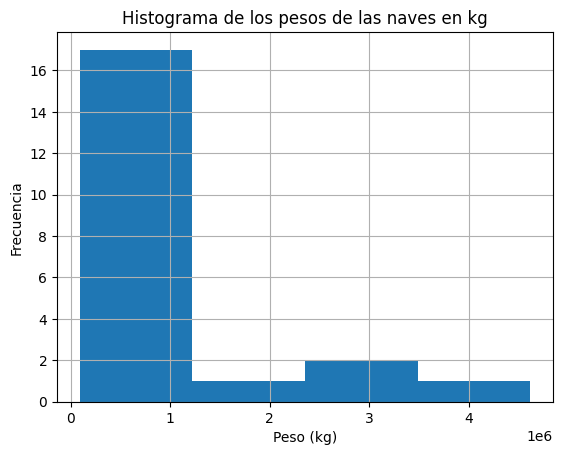

In [108]:
import numpy as np
import matplotlib.pyplot as plt

if df is not None:
    if "mass_kg" in df.columns and df["mass_kg"].notnull().any():
        # Cálculo dinámico del número de bins (Regla de Sturges o Raíz Cuadrada)
        # Número de datos no nulos
        n = df["mass_kg"].notna().sum()
        # Elige el menor entre ambas reglas
        bins = min(1 + int(np.log2(n)), int(np.sqrt(n)))
        print(bins)
        df["mass_kg"].dropna().hist(bins=bins)
        plt.xlabel("Peso (kg)")
        plt.ylabel("Frecuencia")
        plt.title("Histograma de los pesos de las naves en kg")
        plt.show()
    else:
        print("No hay datos de 'mass_kg' para visualizar el histograma.")
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")

El histograma presenta la distribución de los pesos de las naves en kilogramos, utilizando 4 bins. Estos bins fueron determinados mediante la Regla de Sturges o la Raíz Cuadrada del tamaño de la muestra, eligiendo la opción más apropiada para los datos disponibles. En la escala mostrada, cada unidad en el eje horizontal equivale a un millón (1e6) de kilogramos, lo que indica que los pesos analizados oscilan en un rango considerablemente alto. La mayor concentración de datos se encuentra en el primer bin, que cubre pesos de hasta aproximadamente 1 millón de kilogramos, indicando que la mayoría de las naves tienen un peso significativo pero concentrado en la parte más baja del rango observado. Esta distribución sugiere una tendencia hacia la izquierda, conocida como sesgo positivo, con menor frecuencia a medida que los pesos aumentan. En resumen, el histograma muestra que la mayoría de las naves tienen un peso elevado en términos absolutos, con una ligera concentración hacia los valores más bajos del rango y algunos casos excepcionales que alcanzan pesos aún mayores.

### **Ejercicio 2: Limpieza y procesamiento de datos**

Para este ejercicio, cargue de nuevo los datos del Ejercicio 1, pero genere un DataFrame llamado df, solamente con las columnas:

- type
- mass_kg
- year_built
- home_port
- name

In [109]:
## verificar que data exista.
if data:
    df = pd.DataFrame(data, columns=['type', 'mass_kg', 'year_built', 'home_port', 'name'])
else:
    print("No se pudo cargar el DataFrame debido a un error")
df.head()

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,NaN,NaN,Port of Los Angeles,American Islander
2,Cargo,NaN,NaN,Port of Los Angeles,American Spirit
3,Barge,NaN,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella


#### **Revisando datos faltantes:**
##### **Determine cuantos datos faltantes hay en la variable mass_kg del mediante value_counts()**

In [110]:
missing_mass_kg_count = df['mass_kg'].isna().value_counts()

missing_count = missing_mass_kg_count.get(True, 0)
not_missing_count = missing_mass_kg_count.get(False, 0)

print("Conteo de valoress 'mass_kg':")
print(f"- Valores faltantes: {missing_count}")
print(f"- Valores no faltantes: {not_missing_count}")

Conteo de valoress 'mass_kg':
- Valores faltantes: 8
- Valores no faltantes: 21


##### **Crea un DataFrame df1 removiendo las filas que tienen algunos datos faltantes. Por otro lado crea un DataFrame df2 removiendo las filas que tienen todos los datos faltantes. Compáralos y comenta los resultados.**

In [111]:
df1 = df.dropna(how='any')  # Elimina filas con al menos un dato faltante
df2 = df.dropna(how='all')  # Elimina filas con todos los datos faltantes

print("Tamaño del DataFrame original:", df.shape)
print("Tamaño de df1 (sin filas con datos faltantes):", df1.shape)
print("Tamaño de df2 (sin filas completamente vacías):", df2.shape)

Tamaño del DataFrame original: (29, 5)
Tamaño de df1 (sin filas con datos faltantes): (21, 5)
Tamaño de df2 (sin filas completamente vacías): (29, 5)


La comparación revela que algunas filas del DataFrame original contenían valores nulos (8 filas con al menos un dato faltante), pero ninguna fila estaba completamente vacía. Esto indica que los valores faltantes se distribuyen de manera aislada, sin afectar todas las columnas en ninguna fila. Como observamos en el análisis anterior, la columna con la mayor incidencia de valores faltantes es `mass_kg`.

##### **En el DataFrame df completa los datos faltantes por los siguientes tres métodos (muestra y comenta los resultados):**

###### Completar datos faltantes con el número 0.

In [112]:
df_fill_0 = df.fillna(0)
print("Primeras filas completadas con 0:")
df_fill_0.head(size_rows)

Primeras filas completadas con 0:


,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,0.0,0.0,Port of Los Angeles,American Islander
2,Cargo,0.0,0.0,Port of Los Angeles,American Spirit
3,Barge,0.0,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


###### Completar por método de propagación hacia adelante.

In [113]:
df_ffill = df.fillna(method='ffill')
print("Primeras filas completadas por propagación hacia adelante:")
df_ffill.head(10)

Primeras filas completadas por propagación hacia adelante:


C:\Users\wwwde\AppData\Local\Temp\ipykernel_8084\1330791789.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,266712.0,1976.0,Port of Los Angeles,American Islander
2,Cargo,266712.0,1976.0,Port of Los Angeles,American Spirit
3,Barge,266712.0,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


###### Completar los valores faltantes con el promedio de la columna

In [114]:
mass_kg_mean = df['mass_kg'].mean()
df_fill_mean = df.fillna({'mass_kg': mass_kg_mean})
print("Primeras filas con 'mass_kg' completadas con el promedio:")

# Ajustar la visualización temporalmente de decimales
pd.options.display.float_format = '{:.1f}'.format 
df_fill_mean.head(10)

Primeras filas con 'mass_kg' completadas con el promedio:


,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,916838.1,NaN,Port of Los Angeles,American Islander
2,Cargo,916838.1,NaN,Port of Los Angeles,American Spirit
3,Barge,916838.1,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


#### **Operaciones de strings:**
Realice las siguientes operaciones en el DataFrame df:

##### **De la columna home_port extraiga la primera palabra de cada dato y muestre los resultados.**

In [115]:
# Se utiliza str.split() para dividir los valores por espacios y obtener la primera palabra
first_word_home_port = df['home_port'].str.split().str[0]
print("Primera palabra de cada dato en 'home_port':")
first_word_home_port.head(size_rows)

Primera palabra de cada dato en 'home_port':


0     Port
1     Port
2     Port
3     Port
4     Port
5     Port
6     Port
7     Port
8     Port
9     Port
10    Port
11    Port
12    Port
13    Fort
14    Port
15    Port
16    Port
17    Port
18    Port
19    Port
20    Port
21    Port
22    Port
23    Port
24    Port
25    Port
26    Port
27    Port
28    Port
Name: home_port, dtype: object

##### **Determine cuántos datos comienzan con la palabra Port y cuántos datos comienzan con una palabra diferente, ¿Cuáles son las palabras diferentes?**

In [116]:
# Con str.startswith(), se identificó cuántos puertos inician con "Port" y cuántos con otras palabras,
# lo que permite categorizar los nombres de forma eficiente.
starts_with_port = first_word_home_port.str.startswith('Port').sum()
unique_different_starts = first_word_home_port.loc[~first_word_home_port.str.startswith('Port')].unique()

print(f"Cantidad de datos que comienzan con 'Port': {starts_with_port}")
print(f"Palabras diferentes al inicio: {unique_different_starts}")

Cantidad de datos que comienzan con 'Port': 28
Palabras diferentes al inicio: ['Fort']


##### **Filtre el DataFrame con los datos que en la columna name contengan en el string la palabra “GO” y muestre los resultados.**

In [117]:
# Utilizamos str.contains() para buscar cadenas que contienen "GO"
# El parametro "case" lo asignamos en True para que sea sensible a mayúsculas y minúsculas.
filtered_go = df[df['name'].str.contains('GO', case=True, na=False)]
print("Filas que contienen 'GO' en la columna 'name':")
filtered_go.head(size_rows)


Filas que contienen 'GO' en la columna 'name':


,type,mass_kg,year_built,home_port,name
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit
10,Cargo,NaN,2014.0,Port Canaveral,GO Quest


##### **Convierta todos los strings de la columna name en palabras con todas sus letras mayúsculas y muestre los resultados.**

In [118]:
# Convertimos los nombres a mayúsculas con str.upper().
name_upper = df['name'].str.upper()
print("Columna 'name' en mayúsculas:")
name_upper.head(size_rows)

Columna 'name' en mayúsculas:


0                AMERICAN CHAMPION
1                AMERICAN ISLANDER
2                  AMERICAN SPIRIT
3          A SHORTFALL OF GRAVITAS
4               BETTY R GAMBARELLA
5                      ELSBETH III
6                      GO MS CHIEF
7                       GO MS TREE
8                          SHANNON
9                       GO PURSUIT
10                        GO QUEST
11                           MEGAN
12                            HAWK
13                       HOLLYWOOD
14    JUST READ THE INSTRUCTIONS 1
15    JUST READ THE INSTRUCTIONS 2
16                         KELLY C
17                       NRC QUEST
18      OF COURSE I STILL LOVE YOU
19                PACIFIC FREEEDOM
20                 PACIFIC WARRIOR
21                          RACHEL
22                    FINN FALGOUT
23                     LAUREN FOSS
24                 SHELIA BORDELON
25                       MR. JONAH
26                   HOS BRIARWOOD
27                            DOUG
28                  

##### **Convierta todos los strings de la columna type en palabras con todas sus letras minúsculas y muestre los resultados.**

In [119]:
# Convertimos los tipos a minúsculas con str.lower().
type_lower = df['type'].str.lower()
print("Columna 'type' en minúsculas:")
print(type_lower.head(size_rows))

Columna 'type' en minúsculas:
0                  tug
1                cargo
2                cargo
3                barge
4                  tug
5                  tug
6     high speed craft
7     high speed craft
8                cargo
9                cargo
10               cargo
11               cargo
12                 tug
13                 tug
14               barge
15               barge
16                 tug
17               cargo
18               barge
19                 tug
20                 tug
21                 tug
22                 tug
23                 tug
24               cargo
25                 tug
26               cargo
27               cargo
28               cargo
Name: type, dtype: object


##### **Divida todos los strings de la columna home_port por el espacio en blanco y muestre los resultados.**

In [120]:
# Con str.split(), se separaron las palabras por espacios blancos.
# si no se pasa un argumento a str.split(), se usará cualquier
# espacio en blanco (como espacios simples, múltiples espacios, tabulaciones \t, o saltos de línea \n)
# como delimitador, en este caso se especifica espacio en blanco simple.
home_port_split = df['home_port'].str.split(" ")
print("Columna 'home_port' dividida por espacios:")
home_port_split.head(size_rows)

Columna 'home_port' dividida por espacios:


0     [Port, of, Los, Angeles]
1     [Port, of, Los, Angeles]
2     [Port, of, Los, Angeles]
3            [Port, Canaveral]
4     [Port, of, Los, Angeles]
5            [Port, Canaveral]
6            [Port, Canaveral]
7            [Port, Canaveral]
8            [Port, Canaveral]
9            [Port, Canaveral]
10           [Port, Canaveral]
11           [Port, Canaveral]
12           [Port, Canaveral]
13          [Fort, Lauderdale]
14           [Port, Canaveral]
15           [Port, Canaveral]
16    [Port, of, Los, Angeles]
17    [Port, of, Los, Angeles]
18    [Port, of, Los, Angeles]
19    [Port, of, Los, Angeles]
20    [Port, of, Los, Angeles]
21           [Port, Canaveral]
22           [Port, Canaveral]
23           [Port, Canaveral]
24           [Port, Canaveral]
25           [Port, Canaveral]
26           [Port, Canaveral]
27           [Port, Canaveral]
28           [Port, Canaveral]
Name: home_port, dtype: object

##### **Reemplace todas las palabras ‘Port’ que se encuentran en la columna home_port por la abreviación ‘P.’ y muestre los resultados.**

In [121]:
# Usamos str.replace() para abreviar "Port" como "P."
home_port_abbr = df['home_port'].str.replace('Port', 'P.', case=False, regex=False)
print("Columna 'home_port' con 'Port' reemplazado por 'P.':")
print(home_port_abbr.head(10))

Columna 'home_port' con 'Port' reemplazado por 'P.':
0    P. of Los Angeles
1    P. of Los Angeles
2    P. of Los Angeles
3         P. Canaveral
4    P. of Los Angeles
5         P. Canaveral
6         P. Canaveral
7         P. Canaveral
8         P. Canaveral
9         P. Canaveral
Name: home_port, dtype: object


##### **Comente todos los procesos realizados y concluya con las posibilidades de uso de estas herramientas en su campo de acción**

El uso de operaciones con strings en pandas permite manipular y transformar datos textuales de manera eficiente. Estas herramientas son esenciales para tareas como la estandarización y normalización de datos, la extracción de patrones, el reemplazo de valores y la gestión precisa de información textual, facilitando así su análisis y procesamiento.

En mi área de trabajo, la normalización y estandarización de datos provenientes de diversas APIs es una práctica indispensable para garantizar la consistencia en los procesos de integración.

### **Ejercicio 3: Agregación, unión y concatenación de DataFrames**
Para este ejercicio, cargue en la variable df el conjunto de datos que se presentan en el archivo CSV, Anexo 1 - Student Weight Status.csv. Tenga en cuenta el tipo de separador y los encabezados de las columnas.

In [122]:
import pandas as pd

# Ruta fichero
file_path = "Anexo 1 - Student Weight Status.csv"

# Carga del DataFrame con manejo de errores.
try:
    df = pd.read_csv(file_path, sep=',', header=0)  # El separador es la coma (`,`)
    print("Datos cargados exitosamente. Primeras filas del DataFrame:")
    # print(df.head())
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {file_path}. Asegúrate de que el archivo esté en la ruta asignada.")
except pd.errors.ParserError as e:
    print(f"Error de parseo: {e}. Verifica que el separador sea el correcto y que el archivo tenga el formato esperado.")

df.head(5)

Datos cargados exitosamente. Primeras filas del DataFrame:


,LOCATION CODE,COUNTY,AREA NAME,REGION,SCHOOL YEARS,NO. OVERWEIGHT,PCT OVERWEIGHT,NO. OBESE,PCT OBESE,NO. OVERWEIGHT OR OBESE,PCT OVERWEIGHT OR OBESE,GRADE LEVEL,AREA TYPE,STREET ADDRESS,CITY,STATE,ZIP CODE,LATITUDE,LONGITUDE,Location 1
0,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,575.0,18.4,565.0,18.1,1140.0,36.5,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,380.0,19.4,416.0,21.3,796.0,40.7,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,873.0,17.2,994.0,19.6,1867.0,36.9,DISTRICT TOTAL,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,551.0,17.2,571.0,17.8,1122.0,35.0,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,292.0,16.0,413.0,22.6,705.0,38.6,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Fusionando datos:**
##### **Cree un DataFrame p1 con los datos del 0 al 1 con las columnas 'area_name' y 'county' de df.**

In [123]:
# Utilizamos .loc[] para seleccionar las filas y columnas a extraer.
p1 = df.loc[0:1, ['AREA NAME', 'COUNTY']]
print("DataFrame p1:")
p1.head()

DataFrame p1:


,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


##### **Creen un DataFrame p2 con los datos del 2 al 4 con las columnas 'area_name' y 'county' de df.**

In [124]:
# Utilizamos .loc[] para seleccionar las filas y columnas a extraer.
p2 = df.loc[2:4, ['AREA NAME', 'COUNTY']]
print("DataFrame p2:")
p2.head()

DataFrame p2:


,AREA NAME,COUNTY
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


##### **Concatene p1 y p2 y muestre los resultados.**

In [125]:
# Usamos pd.concat() para unir los dos DataFrames sin llaves.
# Esto genera un nuevo DataFrame con las filas de p1 seguidas por las de p2.
concatenated_simple = pd.concat([p1, p2])
print("Concatenación simple de p1 y p2:")
concatenated_simple.head()

Concatenación simple de p1 y p2:


,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


##### **Concatene p1 y p2 identificando las asignaciones por las llaves ‘p1’ y ‘p2’ y muestre los resultados y asígnelos a la variable concatened. Comente las diferencias con el DataFrame anterior y mencione desde su punto de vista las posibles utilidades de esta herramienta.**

In [126]:
# Al concatenar con el parámetro keys=['p1', 'p2'],
# las filas se etiquetan con estas llaves. Esto permite identificar qué filas pertenecen a cada DataFrame
# original.
concatenated_with_keys = pd.concat([p1, p2], keys=['p1', 'p2'])
print("Concatenación con llaves 'p1' y 'p2':")
concatenated_with_keys.head()

Concatenación con llaves 'p1' y 'p2':


AREA NAME       COUNTY
p1 0  CATTARAUGUS  CATTARAUGUS
   1  CATTARAUGUS  CATTARAUGUS
p2 2  CATTARAUGUS  CATTARAUGUS
   3  CATTARAUGUS  CATTARAUGUS
   4  CATTARAUGUS  CATTARAUGUS

La concatenación con llaves es útil cuando se necesita identificar el origen de las filas dentro de un DataFrame combinado. Esto es especialmente relevante en casos donde se trabaja con datos de diferentes fuentes o etapas de procesamiento.

##### **Desde el DataFrame concatened rescate los datos de p1.**

In [127]:
# Utilizamos .loc['p1'] sobre el DataFrame concatenado para recuperar únicamente los datos que pertenecen a p1
p1_rescued = concatenated_with_keys.loc['p1']
print("Datos de 'p1' rescatados del DataFrame concatenado:")
p1_rescued.head()

Datos de 'p1' rescatados del DataFrame concatenado:


,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


##### **Comente los resultados y realice las conclusiones del ejercicio.**

- La capacidad de extraer subconjuntos a partir de claves específicas facilita el análisis segmentado y ofrece diversas opciones para el etiquetado de fuentes, etapas del proceso y otros casos similares.
- Estas herramientas brindan una manipulación flexible de los datos, resultando especialmente útiles en tareas como la integración de información proveniente de múltiples fuentes, la consolidación de resultados de diferentes etapas de análisis o la preparación de datos para procesos de modelado.

#### **Operaciones de agregación:**

##### **Encuentre el número promedio de estudiantes que son obesos en escuelas de primaria (tipo ‘ELEMENTARY’).**

In [128]:
# Utilizamos .mean() para calcular el promedio de la columna NO. OBESE filtrando solo las escuelas primarias (GRADE LEVEL == 'ELEMENTARY').
avg_obese_elementary = df[df['GRADE LEVEL'] == 'ELEMENTARY']['NO. OBESE'].mean()
print(f"Promedio de estudiantes obesos en escuelas de primaria: {avg_obese_elementary}")

Promedio de estudiantes obesos en escuelas de primaria: 275.78676207513416


##### **Encuentre el número total de estudiantes de primaria que son obesos.**

In [129]:
# Con .sum() obtenemos el total de estudiantes obesos en las escuelas primarias.
total_obese_elementary = df[df['GRADE LEVEL'] == 'ELEMENTARY']['NO. OBESE'].sum()
print(f"Total de estudiantes obesos en escuelas de primaria: {total_obese_elementary}")

Total de estudiantes obesos en escuelas de primaria: 770824.0


##### **Encuentre el número máximo de estudiantes obsesos que tiene una escuela.**

In [130]:
# Usamos .max() Para identificar la escuela con la mayor cantidad de estudiantes obesos.
max_obese_students = df['NO. OBESE'].max()
print(f"Número máximo de estudiantes obesos en una escuela: {max_obese_students}")

Número máximo de estudiantes obesos en una escuela: 86016.0


##### **Encuentre el número mínimo de estudiantes obsesos que tiene una escuela.**

In [131]:
# Usamos .min() Para identificar la escuela con la menor cantidad de estudiantes obesos.
min_obese_students = df['NO. OBESE'].min()
print(f"Número mínimo de estudiantes obesos en una escuela: {min_obese_students}")

Número mínimo de estudiantes obesos en una escuela: 5.0


##### **Obtenga la desviación estándar del número de estudiantes obsesos en las escuelas.**

In [132]:
# Utilizamos .std() para medir la dispersión de los valores en la columna NO. OBESE,
# lo que nos da una idea de la variabilidad en la cantidad de estudiantes obesos por escuela.
std_dev_obese_students = df['NO. OBESE'].std()
print(f"Desviación estándar del número de estudiantes obesos: {std_dev_obese_students}")

Desviación estándar del número de estudiantes obesos: 2519.8439356637937


##### **Obtenga la cantidad de escuelas de primarias en el condado (county) de DELAWARE.**

In [133]:
# Con .shape[0] contamos cuántas escuelas primarias (ELEMENTARY) hay en el condado de DELAWARE.
num_elementary_delaware = df[(df['GRADE LEVEL'] == 'ELEMENTARY') & (df['COUNTY'] == 'DELAWARE')].shape[0]
print(f"Cantidad de escuelas primarias en el condado de DELAWARE: {num_elementary_delaware}")

Cantidad de escuelas primarias en el condado de DELAWARE: 52


##### **Comente los resultados del ejercicio y concluya con las posibilidades de uso de estas herramientas en su campo de acción.**

Las herramientas de agregación permiten detectar patrones y tendencias en los datos, lo que facilita el análisis comparativo entre diferentes categorías o grupos. Este tipo de análisis es clave para identificar áreas que requieren atención prioritaria o que representan oportunidades de mejora, proporcionando una visión más clara del comportamiento general de los datos.

Además, disponer de métricas como promedios, sumas, máximos y mínimos permite optimizar la toma de decisiones informadas. Estas métricas facilitan la priorización de acciones y la asignación eficiente de recursos, asegurando que se enfoquen en los aspectos que realmente importan y generan mayor impacto.

#### **Uniones (Joins):**

##### **Defina un DataFrame de búsqueda llamado grade_lookup, que tenga las columnas ‘grade_level y ‘level’ que asigne niveles a cada uno de los grados como sigue: 1 a 'ELEMENTARY', 2 a 'MIDDLE/HIGH', 3 a 'MISC'.**

##### **Por otro lado, tome las primeras cinco filas de la columna de datos en la columna GRADE e imprímalas (Téngalas en cuenta pues las utilizaremos para estudiar los tipos de uniones).**

##### **Describa los inner joins y realice un ejemplo con las primeras 5 filas de la columna grade_level y grade_lookup, muestre sus resultados y explíquelos.**

##### **Describa los left outer joins y realice un ejemplo con las primeras 5 filas de la columna grade_level y grade_lookup, muestre sus resultados y explíquelos.**

##### **Describa los full outer joins y realice un ejemplo con las primeras 5 filas de la columna grade_level y grade_lookup, muestre sus resultados y explíquelos.**